In [1]:
# if (!require("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")

# BiocManager::install("TargetDecoy")

# if (!require("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")

# BiocManager::install("mzID")

In [2]:
setwd('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1001. InVitroWildfire EVProteomics/P1001.3. Analyses/P1001.3.4. Data Processing/Input')
Output = ('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1001. InVitroWildfire EVProteomics/P1001.3. Analyses/P1001.3.4. Data Processing/Output')
cur_date = "062022"

library(readxl)
library(tidyverse)
library(mzID)
library(TargetDecoy)
library(imputeLCMD)
library(factoextra)
library(vegan)


#reading in files
identifiers_df = data.frame(read_excel("Identifiers_030422.xlsx"))
set1_proteome_df = data.frame(read_excel("PC927-Rager_LFQProteome_Results_RawValues_R ready.xlsx", sheet = 1))[,c(1,6,22:35)]
set2_proteome_df = data.frame(read_excel("PC927-Rager_LFQProteome_Results_RawValues_R ready.xlsx", sheet = 2))[,c(1,6,22:35)]

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘mzID’


The following object is masked from ‘package:dplyr’:

    id


The following object is masked from ‘package:purrr’:

    flatten


Warning message in fun(libname, pkgname):
“mzR has been built against a different Rcpp version (1.0.8)
than is installed on your system (1.0.8.3). This might lead to errors
when loading mzR. If you encounter such issues, please send a report,
including the output of sessionInfo() to the Bioc support forum at 
https://support.bioconductor.org/. For details see also
https://github.com/sneumann/mzR/wiki/mzR-Rcpp-compiler-linker-issue.”
Loading required 

In [3]:
head(identifiers_df)
head(set1_proteome_df)
head(set2_proteome_df)

,IDs_from_Core,Our_Analysis_ID,Set
,<chr>,<chr>,<chr>
1,Abundance..Pooled.1,CoCulture_PooledSample1,Set1
2,Abundance..Pooled.2,CoCulture_PooledSample2,Set1
3,Abundance..1..Vehicle,CoCulture_VehicleCT1,Set1
4,Abundance..3..Vehicle,CoCulture_VehicleCT2,Set1
5,Abundance..5..Vehicle,CoCulture_VehicleCT3,Set1
6,Abundance..7..Vehicle,CoCulture_VehicleCT4,Set1


,Accession,Number_of_UniquePeptides,Abundance..Pooled.1,Abundance..Pooled.2,Abundance..1..Vehicle,Abundance..3..Vehicle,Abundance..5..Vehicle,Abundance..7..Vehicle,Abundance..9..Vehicle,Abundance..11..Vehicle,Abundance..2..Wood.Smoke,Abundance..4..Wood.Smoke,Abundance..6..Wood.Smoke,Abundance..8..Wood.Smoke,Abundance..10..Wood.Smoke,Abundance..12..Wood.Smoke
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,P02769,99,4.89e+11,4.43e+11,6.26e+11,4.38e+11,4.74e+11,3.40e+11,4.94e+11,4.85e+11,4.54e+11,6.23e+11,7.37e+11,5.13e+11,3.96e+11,6.86e+11
2,P02751,201,2.73e+11,2.41e+11,2.24e+11,2.43e+11,3.24e+11,2.53e+11,2.45e+11,1.35e+11,1.68e+11,2.37e+11,2.98e+11,2.54e+11,1.97e+11,2.50e+11
3,P12763,34,2.63e+11,2.29e+11,3.10e+11,2.33e+11,2.70e+11,2.42e+11,2.71e+11,2.50e+11,2.67e+11,2.86e+11,3.27e+11,2.63e+11,2.52e+11,3.03e+11
4,Q2UVX4,162,5.65e+10,5.15e+10,6.76e+10,4.31e+10,4.09e+10,4.12e+10,4.92e+10,3.53e+10,4.76e+10,4.01e+10,3.68e+10,6.53e+10,4.45e+10,4.69e+10
5,P98160,210,2.27e+10,2.04e+10,3.01e+10,1.79e+10,1.40e+10,2.64e+10,2.81e+10,2.85e+10,1.97e+10,1.40e+10,1.30e+10,2.19e+10,2.46e+10,2.27e+10
6,P12111,201,2.15e+10,2.03e+10,1.55e+10,2.12e+10,2.29e+10,1.99e+10,2.00e+10,9.49e+09,1.67e+10,2.09e+10,2.67e+10,2.63e+10,2.06e+10,2.60e+10


,Accession,Number_of_UniquePeptides,Abundance..Pooled.1,Abundance..Pooled.2,Abundance..13..Vehicle,Abundance..15..Vehicle,Abundance..17..Vehicle,Abundance..19..Vehicle,Abundance..21..Vehicle,Abundance..23..Vehicle,Abundance..14..Wood.Smoke,Abundance..16..Wood.Smoke,Abundance..18..Wood.Smoke,Abundance..20..Wood.Smoke,Abundance..22..Wood.Smoke,Abundance..24..Wood.Smoke
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,P02751,193,197908273327,215449909749,290377149672,237808533258,300713328573,246820946145,304313034954,264966884310,243333335207,199860505414,279706283336,225170612912,229939459846,154501914723
2,P02769,97,342657042076,370488835120,308967859550,242917660277,278096520636,259674859546,291397652436,563821412595,281882492897,732144132018,248045691869,233383724786,349312465553,251094645011
3,P07996,34,64580519826,73778236233,181775619913,129485605438,169377550217,134685992120,114143664541,249366551496,132714564698,128084639698,112262919453,111419806864,73857936963,108923410421
4,Q2UVX4,160,41255020284,45525199756,55681501380,35618922477,44222632333,47245712210,44043324866,75943777589,53160804546,68298716794,48638631002,47654755526,35704911241,52145684636
5,P98160,207,16164372416,18035124503,20257643320,13577050138,17442737821,24582420164,20491703047,36081485773,20355674908,16277580495,15654918570,19579785521,16823558423,20030021253
6,P12763,32,180364995691,186934859645,159857253388,143580491033,158608208515,140452510019,145834623969,220324446614,137520441019,237042125375,156248949606,124984210103,171103871588,143324724008


In [4]:
# creating 1 proteome df
set1_proteome_df = set1_proteome_df %>%
    pivot_longer(cols = 3:16, names_to = "IDs_from_Core", values_to = "Value") %>%
    mutate(Set = c("Set1"))

set2_proteome_df = set2_proteome_df %>%
    pivot_longer(cols = 3:16, names_to = "IDs_from_Core", values_to = "Value") %>%
    mutate(Set = c("Set2"))

proteome_df = rbind(set1_proteome_df, set2_proteome_df) %>%
    rename(Protein = Accession)
head(proteome_df)

Protein,Number_of_UniquePeptides,IDs_from_Core,Value,Set
<chr>,<dbl>,<chr>,<dbl>,<chr>
P02769,99,Abundance..Pooled.1,4.89e+11,Set1
P02769,99,Abundance..Pooled.2,4.43e+11,Set1
P02769,99,Abundance..1..Vehicle,6.26e+11,Set1
P02769,99,Abundance..3..Vehicle,4.38e+11,Set1
P02769,99,Abundance..5..Vehicle,4.74e+11,Set1
P02769,99,Abundance..7..Vehicle,3.40e+11,Set1


In [5]:
#adding in our own ids
proteome_df = inner_join(identifiers_df, proteome_df) %>%
    select(-IDs_from_Core) %>%
    rename(ID = Our_Analysis_ID, Unique_Peptides = Number_of_UniquePeptides) %>%
    #creating a col that denotes the general treatment to remove proteins within those treatment groups
    mutate(Treatment = ifelse(grepl("CoCulture_PooledSample", ID), "CoCulture_PooledSample",
                             ifelse(grepl("CoCulture_Vehicle", ID), "CoCulture_Vehicle",
                                   ifelse(grepl("CoCulture_Exposed", ID), "CoCulture_Exposed",
                                         ifelse(grepl("TriCulture_PooledSample", ID), "TriCulture_PooledSample",
                                             ifelse(grepl("TriCulture_Vehicle", ID), "TriCulture_Vehicle",
                                                   ifelse(grepl("TriCulture_Exposed", ID), "TriCulture_Exposed",
                                         
                                         NA))))))) %>%
    # removing pooled samples since they're not needed for analysis
    filter(!grepl("PooledSample", Treatment))

head(proteome_df)

Joining, by = c("IDs_from_Core", "Set")


,ID,Set,Protein,Unique_Peptides,Value,Treatment
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,CoCulture_VehicleCT1,Set1,P02769,99,6.26e+11,CoCulture_Vehicle
2,CoCulture_VehicleCT1,Set1,P02751,201,2.24e+11,CoCulture_Vehicle
3,CoCulture_VehicleCT1,Set1,P12763,34,3.10e+11,CoCulture_Vehicle
4,CoCulture_VehicleCT1,Set1,Q2UVX4,162,6.76e+10,CoCulture_Vehicle
5,CoCulture_VehicleCT1,Set1,P98160,210,3.01e+10,CoCulture_Vehicle
6,CoCulture_VehicleCT1,Set1,P12111,201,1.55e+10,CoCulture_Vehicle


In [6]:
# intial number of proteins prior to filtering
length(unique(proteome_df$Protein))

[1] 2167

# 1. Peptide Normalization

Normalize to total amount of peptide per sample: sum the abundance values for each sample, then calculate the median value across all of the summed abundance values, and calculate the ratio

In [7]:
# set 1 = coculture, set 2 = triculture
normalized_df = proteome_df %>%
    group_by(Set, ID) %>%
    #removing missing data
    drop_na() %>%
    mutate(Summed_Value = sum(Value)) %>%
    #calculating median across all samples but still within each set
    ungroup() %>%
    group_by(Set) %>%
    mutate(Median_of_Sum = median(Summed_Value), Norm_Factor = Summed_Value/ Median_of_Sum, 
           Norm_Value = Value/Norm_Factor) %>%
    select(-c("Summed_Value", "Median_of_Sum", "Norm_Factor"))
head(normalized_df)

ID,Set,Protein,Unique_Peptides,Value,Treatment,Norm_Value
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
CoCulture_VehicleCT1,Set1,P02769,99,6.26e+11,CoCulture_Vehicle,553332359066
CoCulture_VehicleCT1,Set1,P02751,201,2.24e+11,CoCulture_Vehicle,197997521455
CoCulture_VehicleCT1,Set1,P12763,34,3.10e+11,CoCulture_Vehicle,274014427013
CoCulture_VehicleCT1,Set1,Q2UVX4,162,6.76e+10,CoCulture_Vehicle,59752823439
CoCulture_VehicleCT1,Set1,P98160,210,3.01e+10,CoCulture_Vehicle,26605916945
CoCulture_VehicleCT1,Set1,P12111,201,1.55e+10,CoCulture_Vehicle,13700721351


I'm getting values on the same order of magnitude, but not exactly the same as those from Proteome Discoverer.

# 2. Log2 Transformation

Did this step later in the imputation functions. 

# 3. Detection Filters (Round 1 & 2)

Round 1 - Unable to replicate the 1% peptide/ 5% protein FDR, so we'll just retain proteins that were identified by at least 2 peptides.

Round 2 - Filter rows based on valid values: 50 % valid in at least one treatment group (i.e. proteins with values observed in fewer than 50% of replicates (here, 3 reps) in at least 1 condition were eliminated from the dataset) 

In [8]:
# only keeping proteins > 2 unique proteins
detection_filter_1_df = proteome_df %>%
    filter(Unique_Peptides > 2)

detection_filter_1_df %>%
    group_by(Set) %>%
    summarize(`Remaining Proteins` = length(unique(Protein)))

Set,Remaining Proteins
<chr>,<int>
Set1,1024
Set2,1382


In [9]:
protein_presence_df = detection_filter_1_df %>%
    #creating 2 count cols: 1st for non-missing data, 2nd for all data
    mutate(data_count = ifelse(is.na(Value), 0, 1), all_count = 1) %>%
    group_by(Set, Treatment, Protein) %>%
    summarize(Protein_Presence = sum(data_count)/ sum(all_count) * 100) %>%
    filter(Protein_Presence < 50) %>%
    arrange(Protein_Presence) 

head(protein_presence_df)

# getting the proteins in the entire set that will be removed
removed_proteins_df = protein_presence_df %>%
    ungroup() %>%
    select(-c("Treatment", "Protein_Presence")) %>% 
    unique()

# number of proteins removed from each set for the 2nd detection filter
removed_proteins_df %>%
    group_by(Set) %>%
    summarize(`Removed Proteins` = length(unique(Protein)))

`summarise()` has grouped output by 'Set', 'Treatment'. You can override using
the `.groups` argument.


Set,Treatment,Protein,Protein_Presence
<chr>,<chr>,<chr>,<dbl>
Set1,CoCulture_Exposed,O75146,0
Set1,CoCulture_Exposed,O95810,0
Set1,CoCulture_Exposed,P11387,0
Set1,CoCulture_Exposed,P27694,0
Set1,CoCulture_Exposed,P49736,0
Set1,CoCulture_Exposed,P52292,0


Set,Removed Proteins
<chr>,<int>
Set1,38
Set2,5


In [10]:
# removing those 43 proteins from the entire dataset (but within each set)
# finding proteins that exist only in the proteome_df but not the removed proteins_df
detection_filter_2_df = anti_join(detection_filter_1_df, removed_proteins_df)
head(detection_filter_2_df)

# number of proteins kept
detection_filter_2_df %>%
    group_by(Treatment) %>%
    summarize(`Removed Proteins` = length(unique(Protein)))

Joining, by = c("Set", "Protein")


,ID,Set,Protein,Unique_Peptides,Value,Treatment
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,CoCulture_VehicleCT1,Set1,P02769,99,6.26e+11,CoCulture_Vehicle
2,CoCulture_VehicleCT1,Set1,P02751,201,2.24e+11,CoCulture_Vehicle
3,CoCulture_VehicleCT1,Set1,P12763,34,3.10e+11,CoCulture_Vehicle
4,CoCulture_VehicleCT1,Set1,Q2UVX4,162,6.76e+10,CoCulture_Vehicle
5,CoCulture_VehicleCT1,Set1,P98160,210,3.01e+10,CoCulture_Vehicle
6,CoCulture_VehicleCT1,Set1,P12111,201,1.55e+10,CoCulture_Vehicle


Treatment,Removed Proteins
<chr>,<int>
CoCulture_Exposed,986
CoCulture_Vehicle,986
TriCulture_Exposed,1377
TriCulture_Vehicle,1377


# 5. QRILC Imputation

QRILC replaces data with left-censored data from a Gaussian distribution. 

In [14]:
# going back and retrieve proteins with missing data not in the removed proteins df
missing_data_presence_df = detection_filter_1_df %>%
    #creating 2 count cols: 1st for non-missing data, 2nd for all data
    mutate(data_count = ifelse(is.na(Value), 0, 1), all_count = 1) %>%
    group_by(Set, Treatment, Protein) %>%
    mutate(Protein_Presence = sum(data_count)/ sum(all_count) * 100) %>%
    filter(Protein_Presence > 50, is.na(Value)) %>%
    # adding a col for the unimputed normalized value
    mutate(Norm_Value = NA)

missing_data_presence_df = missing_data_presence_df[,c(1,2,6,3,5,10)]
head(missing_data_presence_df)


# getting the proteins in the entire set that will be added back
added_proteins_df = missing_data_presence_df %>%
    ungroup() %>%
    select(-c("Treatment")) %>% 
    unique()

# number of proteins removed from each set for the 2nd detection filter
added_proteins_df %>%
    group_by(Set) %>%
    summarize(`Added Proteins` = length(unique(Protein)))

ID,Set,Treatment,Protein,Value,Norm_Value
<chr>,<chr>,<chr>,<chr>,<dbl>,<lgl>
CoCulture_VehicleCT1,Set1,CoCulture_Vehicle,Q8IZ83,NA,NA
CoCulture_VehicleCT1,Set1,CoCulture_Vehicle,P02668,NA,NA
CoCulture_VehicleCT1,Set1,CoCulture_Vehicle,P23921,NA,NA
CoCulture_VehicleCT1,Set1,CoCulture_Vehicle,O60841,NA,NA
CoCulture_VehicleCT1,Set1,CoCulture_Vehicle,Q8NC51,NA,NA
CoCulture_VehicleCT1,Set1,CoCulture_Vehicle,P50570,NA,NA


Set,Added Proteins
<chr>,<int>
Set1,95
Set2,118


In [17]:
head(detection_filter_normalized_df)
head(added_proteins_df)

,ID,Set,Protein,Unique_Peptides,Value,Treatment,Norm_Value
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
1,CoCulture_VehicleCT1,Set1,P02769,99,6.26e+11,CoCulture_Vehicle,553332359066
2,CoCulture_VehicleCT1,Set1,P02751,201,2.24e+11,CoCulture_Vehicle,197997521455
3,CoCulture_VehicleCT1,Set1,P12763,34,3.10e+11,CoCulture_Vehicle,274014427013
4,CoCulture_VehicleCT1,Set1,Q2UVX4,162,6.76e+10,CoCulture_Vehicle,59752823439
5,CoCulture_VehicleCT1,Set1,P98160,210,3.01e+10,CoCulture_Vehicle,26605916945
6,CoCulture_VehicleCT1,Set1,P12111,201,1.55e+10,CoCulture_Vehicle,13700721351


ID,Set,Protein,Value,Norm_Value
<chr>,<chr>,<chr>,<dbl>,<lgl>
CoCulture_VehicleCT1,Set1,Q8IZ83,NA,NA
CoCulture_VehicleCT1,Set1,P02668,NA,NA
CoCulture_VehicleCT1,Set1,P23921,NA,NA
CoCulture_VehicleCT1,Set1,O60841,NA,NA
CoCulture_VehicleCT1,Set1,Q8NC51,NA,NA
CoCulture_VehicleCT1,Set1,P50570,NA,NA


In [16]:
# adding in normalized values to the filtered df
# left join returns all the records from the first table along with matching records from the second
detection_filter_normalized_df = left_join(detection_filter_2_df, normalized_df) 

preimputed_df = rbind(detection_filter_normalized_df %>% 
                      select(-Unique_Peptides), added_proteins_df) %>%
    unique()


# for some reason this protein had 2 entries, so removing the entries with all the missing data
single_protein_missing_data = preimputed_df %>%
    filter(is.na(Value) , Protein == "P08727")
preimputed_df = anti_join(preimputed_df, single_protein_missing_data)

preimputed_df = preimputed_df[, c(1,2,5,3,4,6)]
head(preimputed_df)

Joining, by = c("ID", "Set", "Protein", "Unique_Peptides", "Value",
"Treatment")


ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'unique': numbers of columns of arguments do not match


In [28]:
# number of proteins with missing data that will be added back to the dataset
missing_data_df %>%
    group_by(Treatment) %>%
    summarize(`Added Proteins` = length(unique(Protein)))

Treatment,Added Proteins
<chr>,<int>
CoCulture_Exposed,64
CoCulture_Vehicle,65
TriCulture_Exposed,50
TriCulture_Vehicle,95


In [14]:
# first splitting df to impute within set and treatment (not imputing pooled treatment groups)
# also imputing based treatment, because exposed and unexposed groups are likely to have different distrubtions
preimputed_df_split = preimputed_df %>%
    group_by(Set, Treatment) %>%
    group_split()

coculture_exp_preimputed_df = preimputed_df_split[[1]]
coculture_pooled_preimputed_df = preimputed_df_split[[2]]
coculture_vehicleCT_preimputed_df = preimputed_df_split[[3]] %>%
    # for some reason this protein had another duplicate value, so removing it here
    filter(Protein != "P08727" | Value != 17368304)
triculture_exp_preimputed_df = preimputed_df_split[[4]]
triculture_pooled_preimputed_df = preimputed_df_split[[5]]
triculture_vehicleCT_preimputed_df = preimputed_df_split[[6]]

In [15]:
# QRILC
QRILC_imputation = function(dataset){
    wider_dataset = dataset %>%
        select(-c("Set", "Value", "Treatment")) %>%
        pivot_wider(names_from = Protein, values_from = Norm_Value) 
    
    # normalizing data since that's what the QRILC function wants
    QRILC_prep = wider_dataset[,2:dim(wider_dataset)[2]] %>%
         mutate_all(., function(x) log2(x)) %>%
         as.matrix()

    imputed_QRILC_object = impute.QRILC(QRILC_prep, tune.sigma = 0.1)
    QRILC_log2_df = data.frame(imputed_QRILC_object[1]) 
    
    # converting back the original scale
    QRILC_df = QRILC_log2_df %>%
        mutate_all(., function(x) 2^x - 1)
    
    # adding a replicate col so values can be uniquely identified for pca later, also adding back in ID col
    QRILC_df = cbind(ID = wider_dataset$ID, QRILC_df)
            
    # adding back in Tx, and Set columns
    final_pivoted_column_number = dim(QRILC_df)[2] + 2
    imputed_dataset = data.frame(cbind(dataset[1:6,2:3], QRILC_df)) %>%
        pivot_longer(cols = 4:all_of(final_pivoted_column_number), names_to = "Protein", values_to = "Value")
    
   return(imputed_dataset)
}

# calling fn
coculture_exp_imputed_df = QRILC_imputation(coculture_exp_preimputed_df)
coculture_vehicleCT_imputed_df = QRILC_imputation(coculture_vehicleCT_preimputed_df)
triculture_exp_imputed_df = QRILC_imputation(triculture_exp_preimputed_df)
triculture_vehicleCT_imputed_df = QRILC_imputation(triculture_vehicleCT_preimputed_df)

In [16]:
 head(coculture_exp_imputed_df)

Set,Treatment,ID,Protein,Value
<chr>,<chr>,<chr>,<chr>,<dbl>
Set1,CoCulture_Exposed,CoCulture_Exposed1,P02769,498266095581
Set1,CoCulture_Exposed,CoCulture_Exposed1,P02751,184380405413
Set1,CoCulture_Exposed,CoCulture_Exposed1,P12763,293033144317
Set1,CoCulture_Exposed,CoCulture_Exposed1,Q2UVX4,52241114866
Set1,CoCulture_Exposed,CoCulture_Exposed1,P98160,21620797539
Set1,CoCulture_Exposed,CoCulture_Exposed1,P12111,18328290299


In [27]:
rbind(coculture_exp_imputed_df, coculture_vehicleCT_imputed_df, triculture_exp_imputed_df, 
      triculture_vehicleCT_imputed_df) %>%
    group_by(Treatment) %>%
    summarize(`Final Number of Proteins` = length(unique(Protein)))

coculture_vehicleCT_imputed_df %>%
    filter(Protein %notin% coculture_exp_imputed_df$Protein) %>%
    summarize(`Inconsistent Proteins` = unique(Protein))

triculture_vehicleCT_imputed_df %>%
    filter(Protein %notin% triculture_exp_imputed_df$Protein) %>%
    summarize(`Inconsistent Proteins` = unique(Protein))

Treatment,Final Number of Proteins
<chr>,<int>
CoCulture_Exposed,990
CoCulture_Vehicle,1003
TriCulture_Exposed,1378
TriCulture_Vehicle,1378


Inconsistent Proteins
<chr>
Q8IUE6
P78559
Q15393
P10809
O00429
P14866
Q13263
P06493
P31689


Inconsistent Proteins
<chr>
P19525


# 6. PCA

Using PCA to identify and remove outlier proteins.

In [17]:
pca_prep_coculture_exp_df = coculture_exp_imputed_df %>%
    select(-c("Set", "Treatment")) %>%
    pivot_wider(names_from = ID, values_from = Value) %>%
    column_to_rownames(var = "Protein")

pca_prep_coculture_vehicleCT_df = coculture_vehicleCT_imputed_df %>%
    select(-c("Set", "Treatment")) %>%
    pivot_wider(names_from = ID, values_from = Value) %>%
    column_to_rownames(var = "Protein")

pca_prep_triculture_exp_df = triculture_exp_imputed_df %>%
    select(-c("Set", "Treatment")) %>%
    pivot_wider(names_from = ID, values_from = Value) %>%
    column_to_rownames(var = "Protein")

pca_prep_triculture_vehicleCT_df = triculture_vehicleCT_imputed_df %>%
    select(-c("Set", "Treatment")) %>%
    pivot_wider(names_from = ID, values_from = Value) %>%
    column_to_rownames(var = "Protein")

head(pca_prep_coculture_exp_df)

,CoCulture_Exposed1,CoCulture_Exposed2,CoCulture_Exposed3,CoCulture_Exposed4,CoCulture_Exposed5,CoCulture_Exposed6
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
P02769,498266095581,608360548946,615901141484,5.13e+11,443295990347,592484922889
P02751,184380405413,231430899037,249034654222,2.54e+11,220528560854,215920161402
P12763,293033144317,279279481538,273269570237,2.63e+11,282097448402,261695235620
Q2UVX4,52241114866,39157717515,30753272735,6.53e+10,49814827197,40506622278
P98160,21620797539,13671023571,10863927868,2.19e+10,27538084248,19605550654
P12111,18328290299,20408885188,22312836468,2.63e+10,23060346972,22455696785


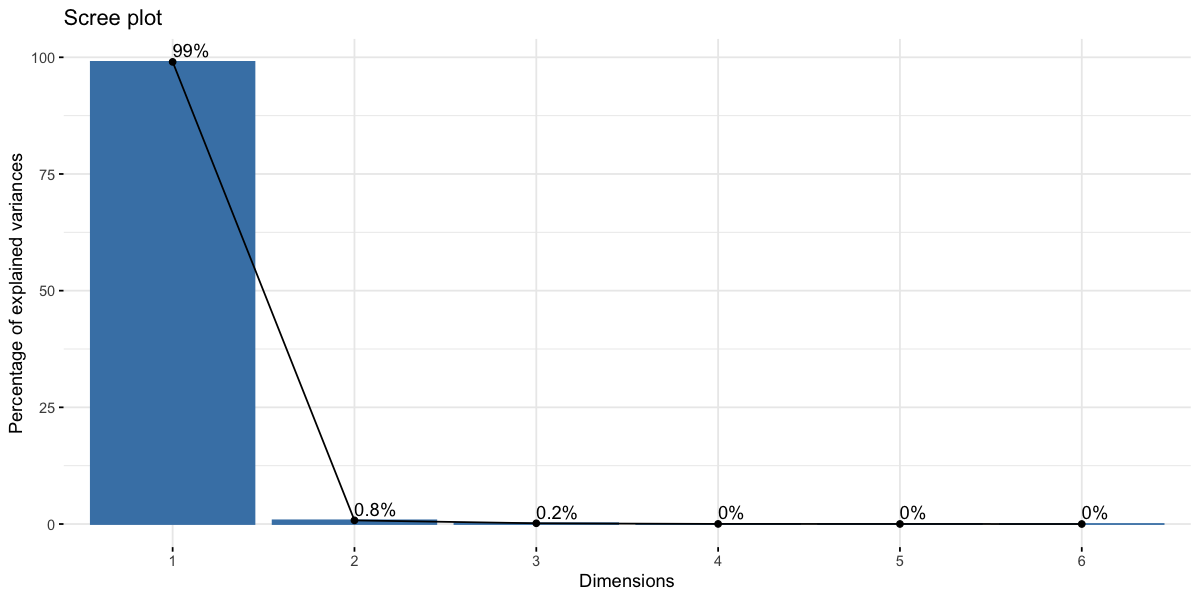

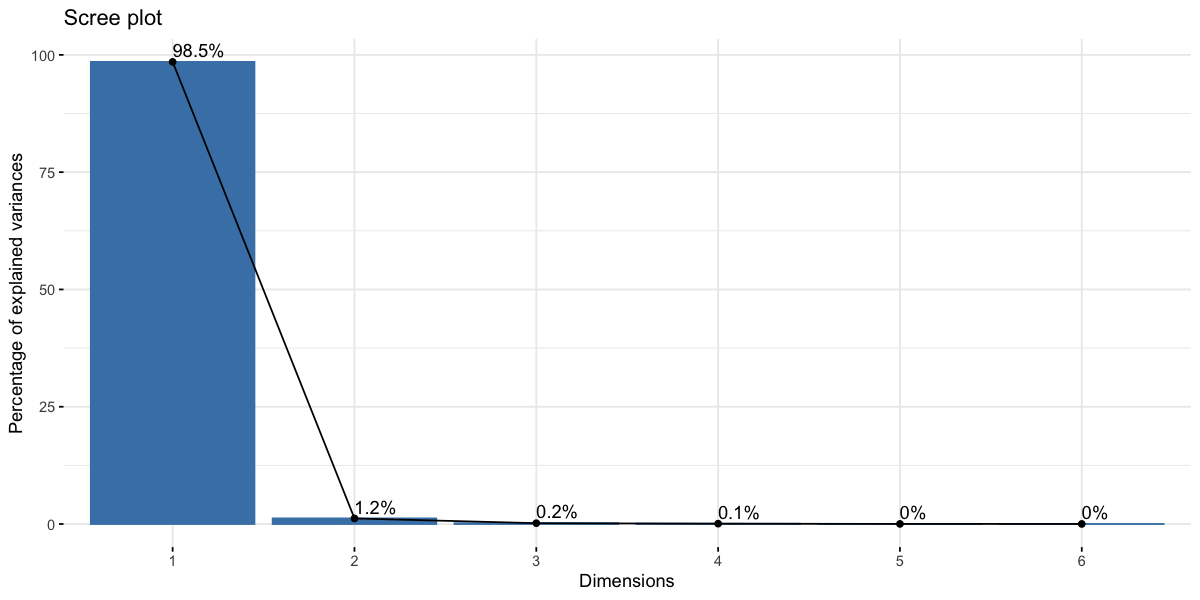

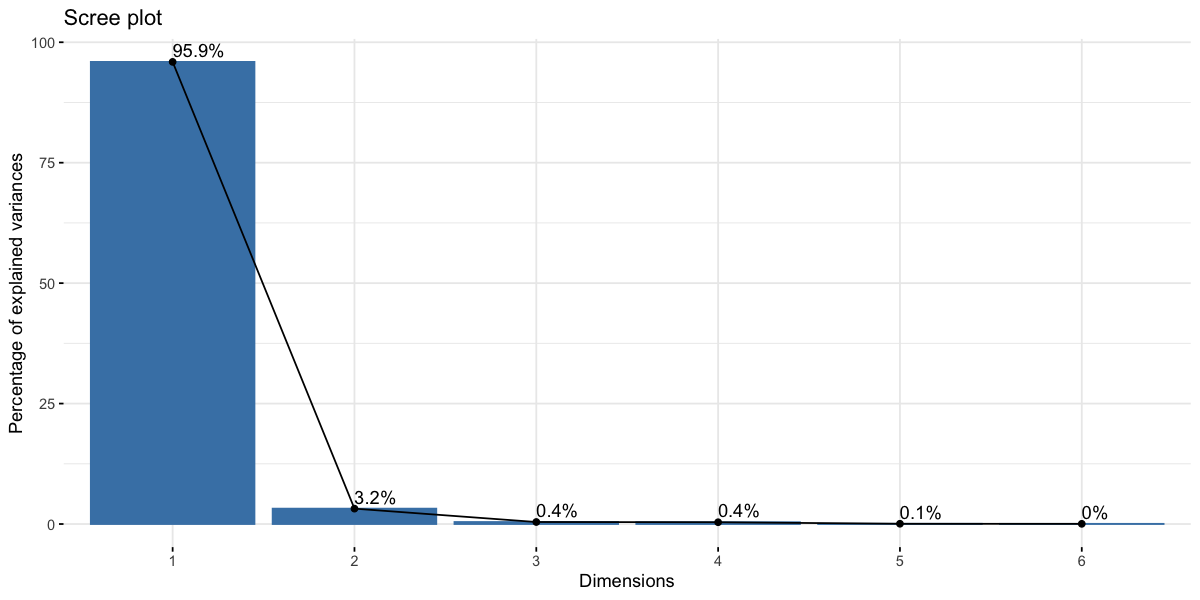

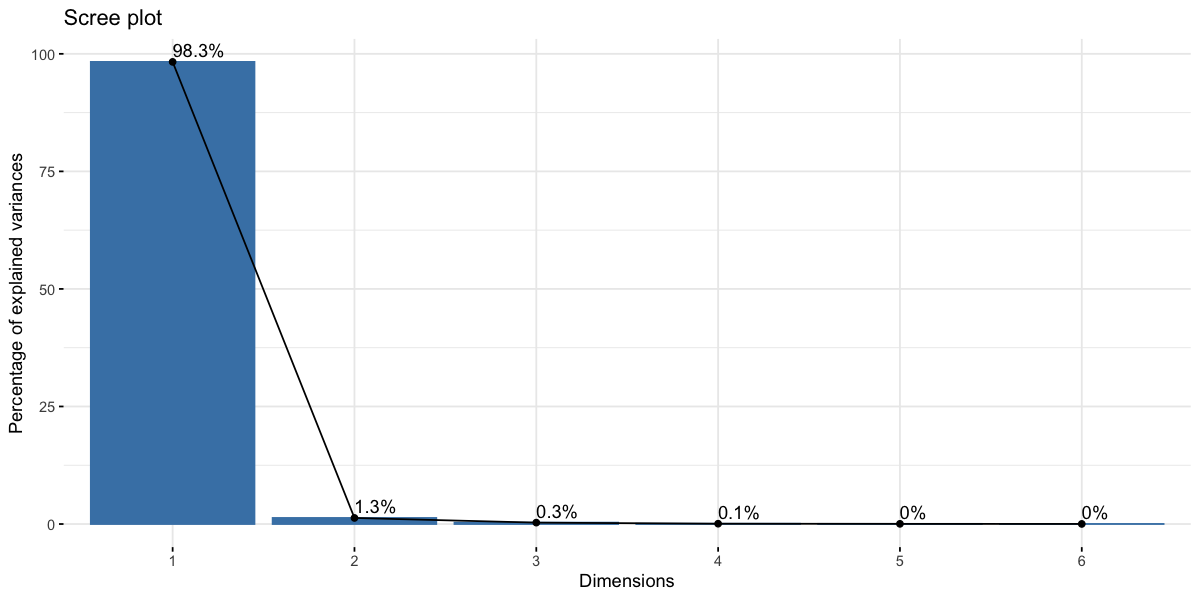

In [18]:
# running PCA
# unable to run pca on entire dataset, each treatment included different proteins creating missing data
# variables = replicates, individuals = proteins
pca_coculture_exp = prcomp(pca_prep_coculture_exp_df, scale = TRUE)
pca_coculture_vehicleCT = prcomp(pca_prep_coculture_vehicleCT_df, scale = TRUE)
pca_triculture_exp = prcomp(pca_prep_triculture_exp_df, scale = TRUE)
pca_triculture_vehicleCT = prcomp(pca_prep_triculture_vehicleCT_df, scale = TRUE)

# viewing scree plots to see how much of the variance was captured in first 2 eigenvectors
options(repr.plot.width=10, repr.plot.height=5) #changing size
fviz_eig(pca_coculture_exp, addlabels = TRUE)
fviz_eig(pca_coculture_vehicleCT, addlabels = TRUE)
fviz_eig(pca_triculture_exp, addlabels = TRUE)
fviz_eig(pca_triculture_vehicleCT, addlabels = TRUE)

Warning message:
“ggrepel: 983 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 995 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


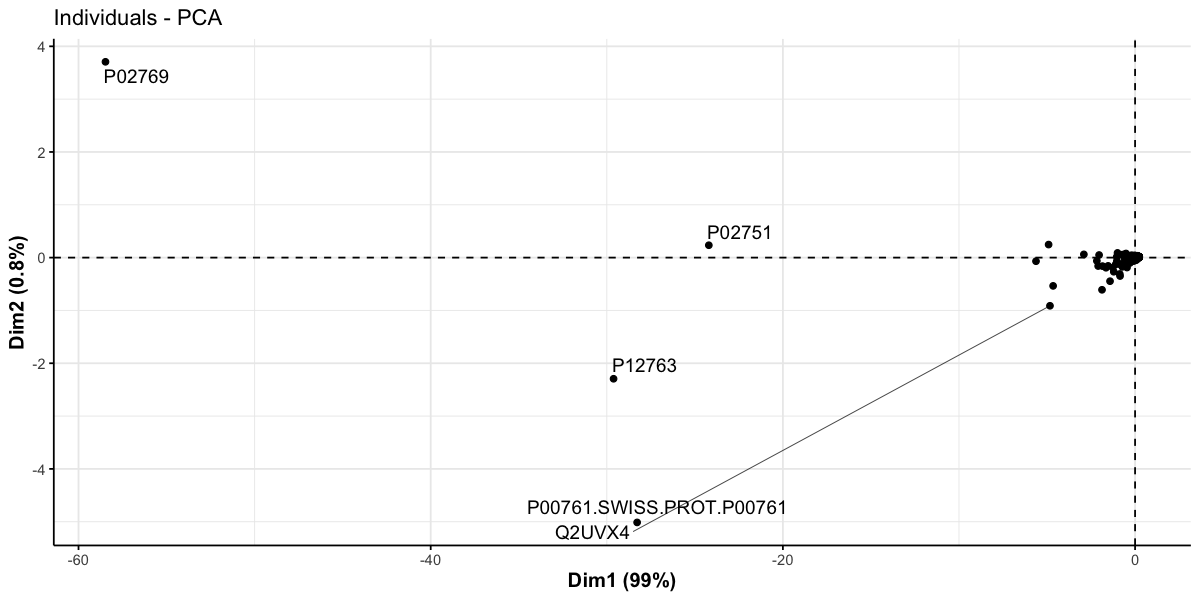

Warning message:
“ggrepel: 1371 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


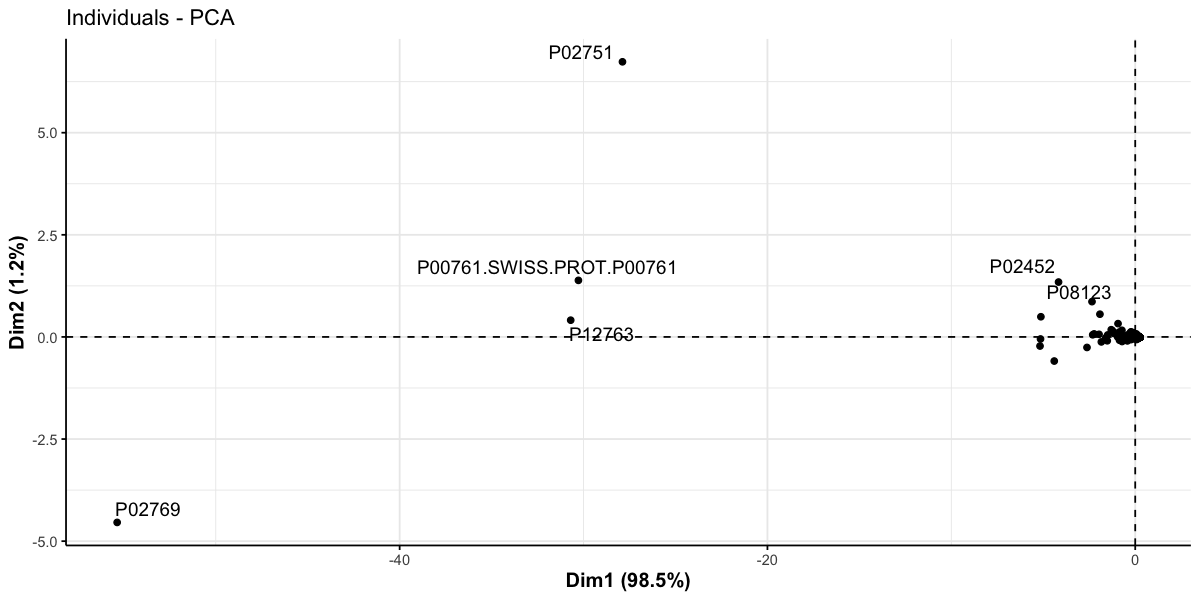

Warning message:
“ggrepel: 1369 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


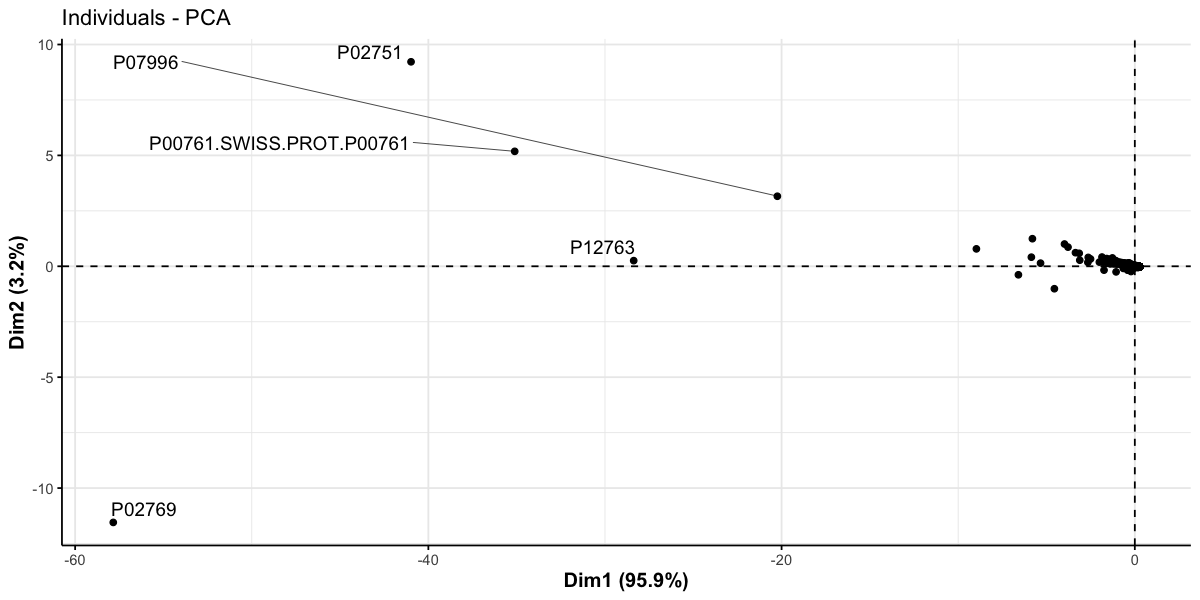

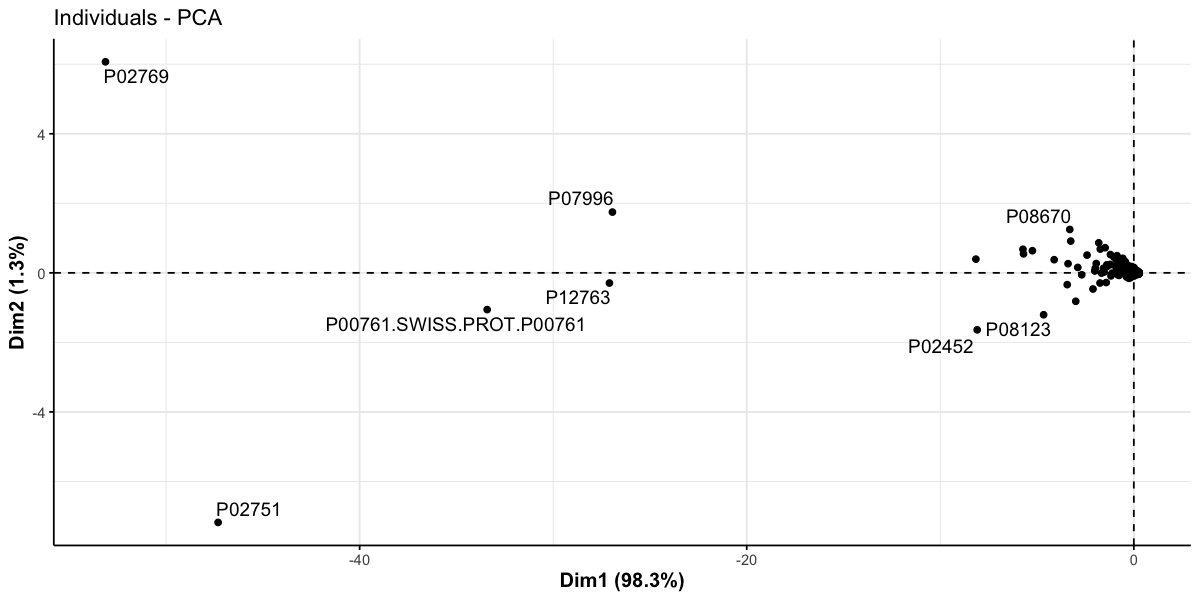

In [19]:
# visualizing all data to detect outliers
fviz_pca_ind(pca_coculture_exp, 
             repel = TRUE) +
theme(axis.line = element_line(colour = "black"), #making x and y axes black
      legend.text = element_text(size = 8),
      axis.title = element_text(face = "bold", size = rel(1.1))) #changes axis titles

fviz_pca_ind(pca_coculture_vehicleCT, 
             repel = TRUE) +
theme(axis.line = element_line(colour = "black"), #making x and y axes black
      legend.text = element_text(size = 8),
      axis.title = element_text(face = "bold", size = rel(1.1))) #changes axis titles

fviz_pca_ind(pca_triculture_exp, 
             repel = TRUE) +
theme(axis.line = element_line(colour = "black"), #making x and y axes black
      legend.text = element_text(size = 8),
      axis.title = element_text(face = "bold", size = rel(1.1))) #changes axis titles

fviz_pca_ind(pca_triculture_vehicleCT, 
             repel = TRUE) +
theme(axis.line = element_line(colour = "black"), #making x and y axes black
      legend.text = element_text(size = 8),
      axis.title = element_text(face = "bold", size = rel(1.1))) #changes axis titles

Not sure how to label the points in the above graphs, but I'll use a formula to detect outliers rather than visual inspection. 

The standard way to detect outliers in genetics is the criterion of being “more than 6 standard deviations away from the mean”. [source](https://privefl.github.io/blog/detecting-outlier-samples-in-pca/)

In [20]:
outlier_detection = function(pca_df){
    # """
    # Creating a scoring function for to detect PCA outliers. 
    # :param (input): PCA df (df)
    # :output: outlier names
    # """
    
    # getting scores
    scores = pca_df$x
    # identifying proteins that are > 6 standard deviations away from the mean
    outlier_indices = apply(scores, 2, function(x) which( abs(x - mean(x)) > (6 * sd(x)) )) %>%
        Reduce(union, .)
    # getting protein names
    outliers = rownames(scores)[outlier_indices]
    
    return(outliers)
}

# calling fn
coculture_exp_outliers = outlier_detection(pca_coculture_exp)
coculture_vehicleCT_outliers = outlier_detection(pca_coculture_vehicleCT)
triculture_exp_outliers = outlier_detection(pca_triculture_exp)
triculture_vehicleCT_outliers = outlier_detection(pca_triculture_vehicleCT)

In [21]:
# number of proteins to be removed from this filter
length(coculture_exp_outliers)
length(coculture_vehicleCT_outliers)
length(triculture_vehicleCT_outliers)
length(triculture_vehicleCT_outliers)

[1] 18

[1] 14

[1] 21

[1] 21

In [22]:
`%notin%` <- Negate(`%in%`)
final_coculture_exp_df = coculture_exp_imputed_df %>%
    filter(Protein %notin% coculture_exp_outliers)
final_coculture_vehicleCT_df = coculture_vehicleCT_imputed_df %>%
    filter(Protein %notin% coculture_vehicleCT_outliers)
final_triculture_exp_df = triculture_exp_imputed_df %>%
    filter(Protein %notin% triculture_exp_outliers)
final_triculture_vehicleCT_df = triculture_vehicleCT_imputed_df %>%
    filter(Protein %notin% triculture_exp_outliers)

final_df = rbind(final_coculture_exp_df, final_coculture_vehicleCT_df, final_triculture_exp_df, 
                 final_triculture_vehicleCT_df)
head(final_df)

Set,Treatment,ID,Protein,Value
<chr>,<chr>,<chr>,<chr>,<dbl>
Set1,CoCulture_Exposed,CoCulture_Exposed1,P12111,18328290299
Set1,CoCulture_Exposed,CoCulture_Exposed1,P21333,6354538971
Set1,CoCulture_Exposed,CoCulture_Exposed1,P35555,6541114382
Set1,CoCulture_Exposed,CoCulture_Exposed1,P34955,51911864142
Set1,CoCulture_Exposed,CoCulture_Exposed1,P07996,10645773407
Set1,CoCulture_Exposed,CoCulture_Exposed1,P08123,13828530405


In [23]:
# final number of proteins for each treatment
final_df %>%
    group_by(Treatment) %>%
    summarize(`Final Number of Proteins` = length(unique(Protein)))

Treatment,Final Number of Proteins
<chr>,<int>
CoCulture_Exposed,972
CoCulture_Vehicle,989
TriCulture_Exposed,1364
TriCulture_Vehicle,1364


In [24]:
# comparing proteins to see which are not present in both datasets
final_coculture_vehicleCT_df %>%
    filter(Protein %notin% final_coculture_exp_df$Protein) %>%
    summarize(`Inconsistent Proteins` = unique(Protein))

final_triculture_vehicleCT_df %>%
    filter(Protein %notin% final_triculture_exp_df$Protein) %>%
    summarize(`Inconsistent Proteins` = unique(Protein))

Inconsistent Proteins
<chr>
Q0IIK2
O00468
ENSEMBL.ENSBTAP00000018229
P15497
P60709
Q8IUE6
P78559
Q15393
P10809


Inconsistent Proteins
<chr>
P19525


In [25]:
#exporting results
write.csv(final_df, paste0(Output,"/", cur_date, "_Imputed_Proteomics_Data.csv"), row.names = FALSE)